# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
from sklearn.metrics import explained_variance_score
import seaborn as sns
# Import norm package to plot normal distribution
from scipy.stats import norm

In [2]:
df=pd.read_csv("stockprice1.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94
1,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
2,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
3,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
4,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
Date                    1235 non-null object
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null int64
Turnover (Lacs)         1235 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [5]:
column=df.columns
df[column].isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
corr=df.corr()
corr

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


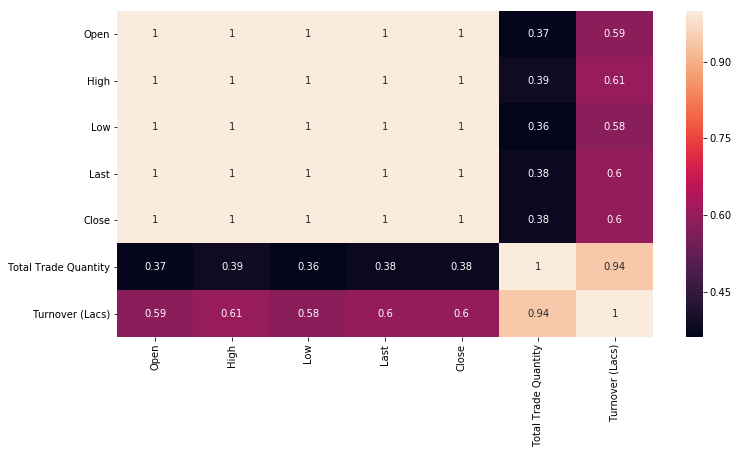

In [7]:
figure=plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 0, 'Year')

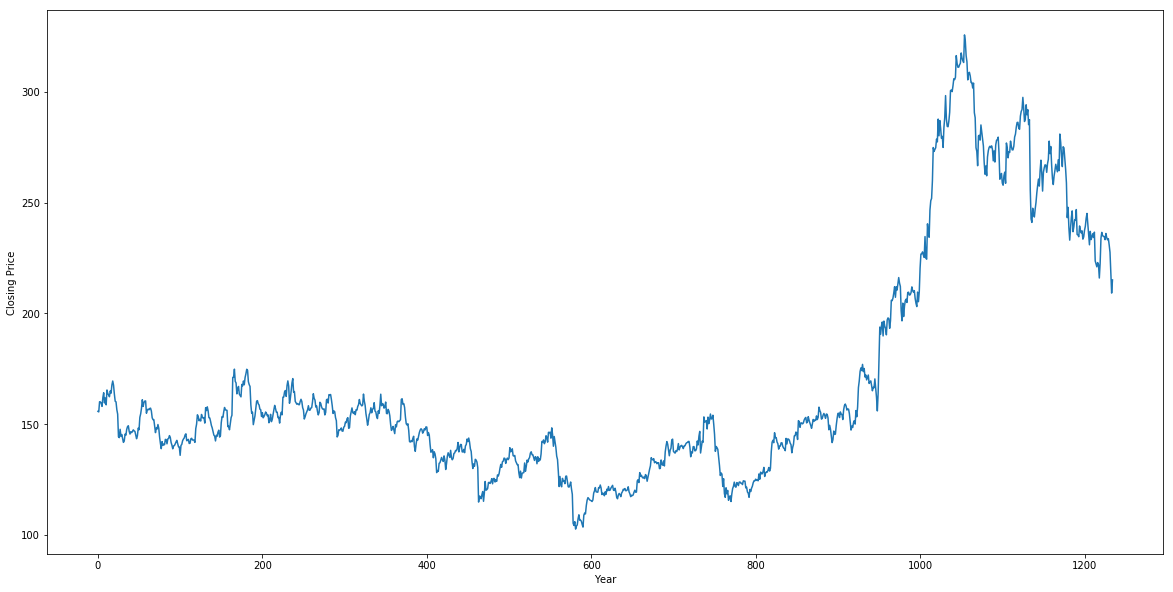

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'])
plt.ylabel("Closing Price")
plt.xlabel("Year")

# LINEAR REGRESSION

In [9]:
x=np.array(df.index).reshape(-1, 1)
y=df["Close"]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [11]:
x


array([[   0],
       [   1],
       [   2],
       ...,
       [1232],
       [1233],
       [1234]], dtype=int64)

In [12]:
y.head()

0    155.80
1    155.55
2    160.15
3    160.05
4    159.45
Name: Close, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression() 
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(regressor.coef_)))
# The Intercept
print('Intercept: ', regressor.intercept_)

Slope:  0.0862142963722331
Intercept:  116.00697493275374


# Interpreting the coefficients:

#### The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.08621 $
#### The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

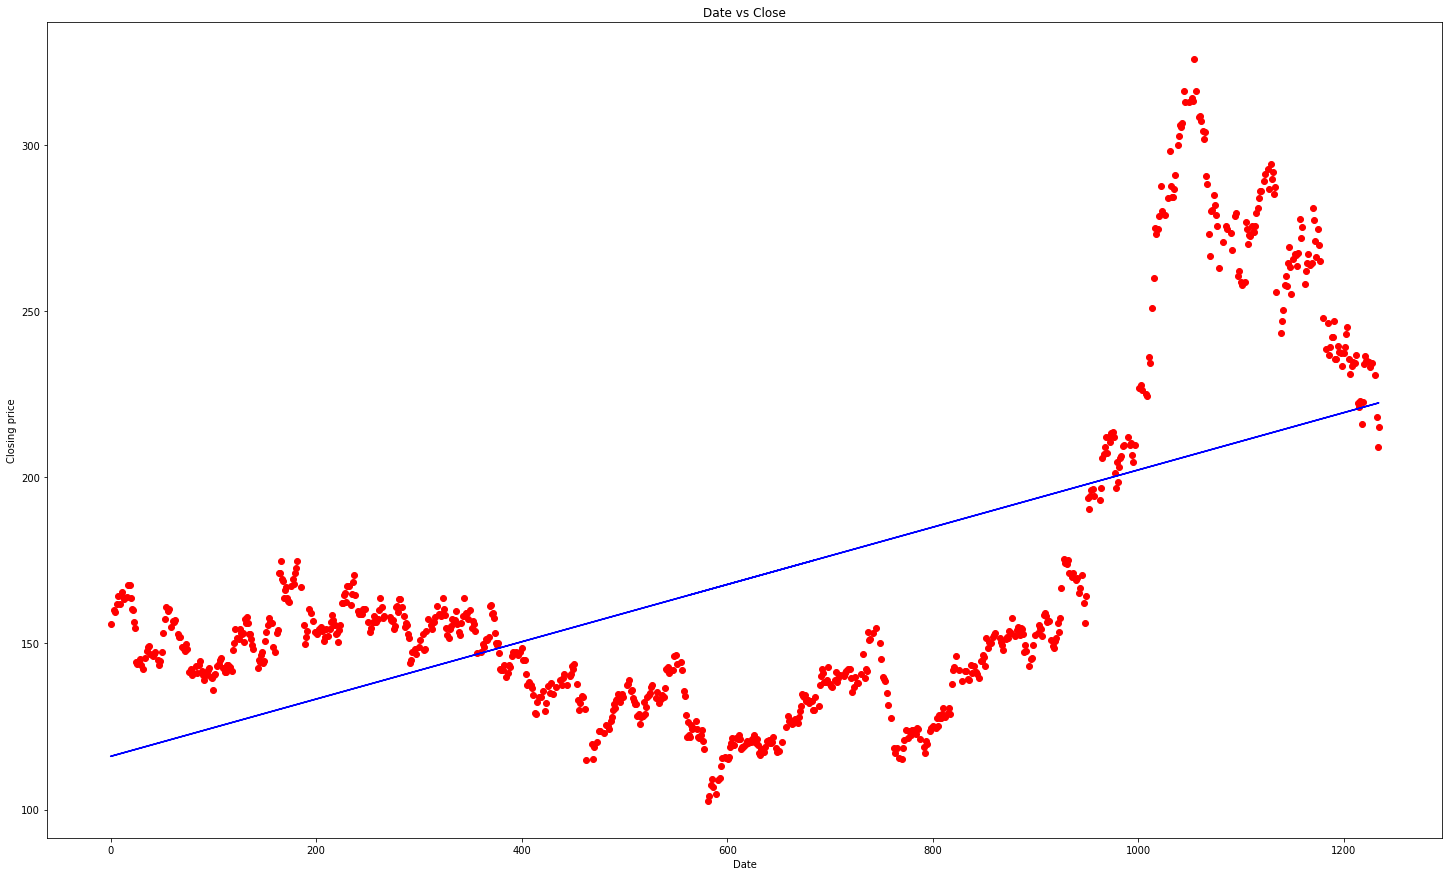

In [15]:
plt.figure(1, figsize=(25,15))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')  # this will plot the line
plt.title('Date vs Close')  # title of the graph
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

In [62]:
y_pred11=regressor.predict(x_test)

In [17]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred11))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred11))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred11)))

Mean Absolute Error: 35.36717842615895
Mean Squared Error: 1751.649661529401
Root Mean Squared Error: 41.85271390877061


In [18]:
explained_variance_score(y_test, y_pred11)

0.3833150038585833

# POLYNOMIAL REGRESSION

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

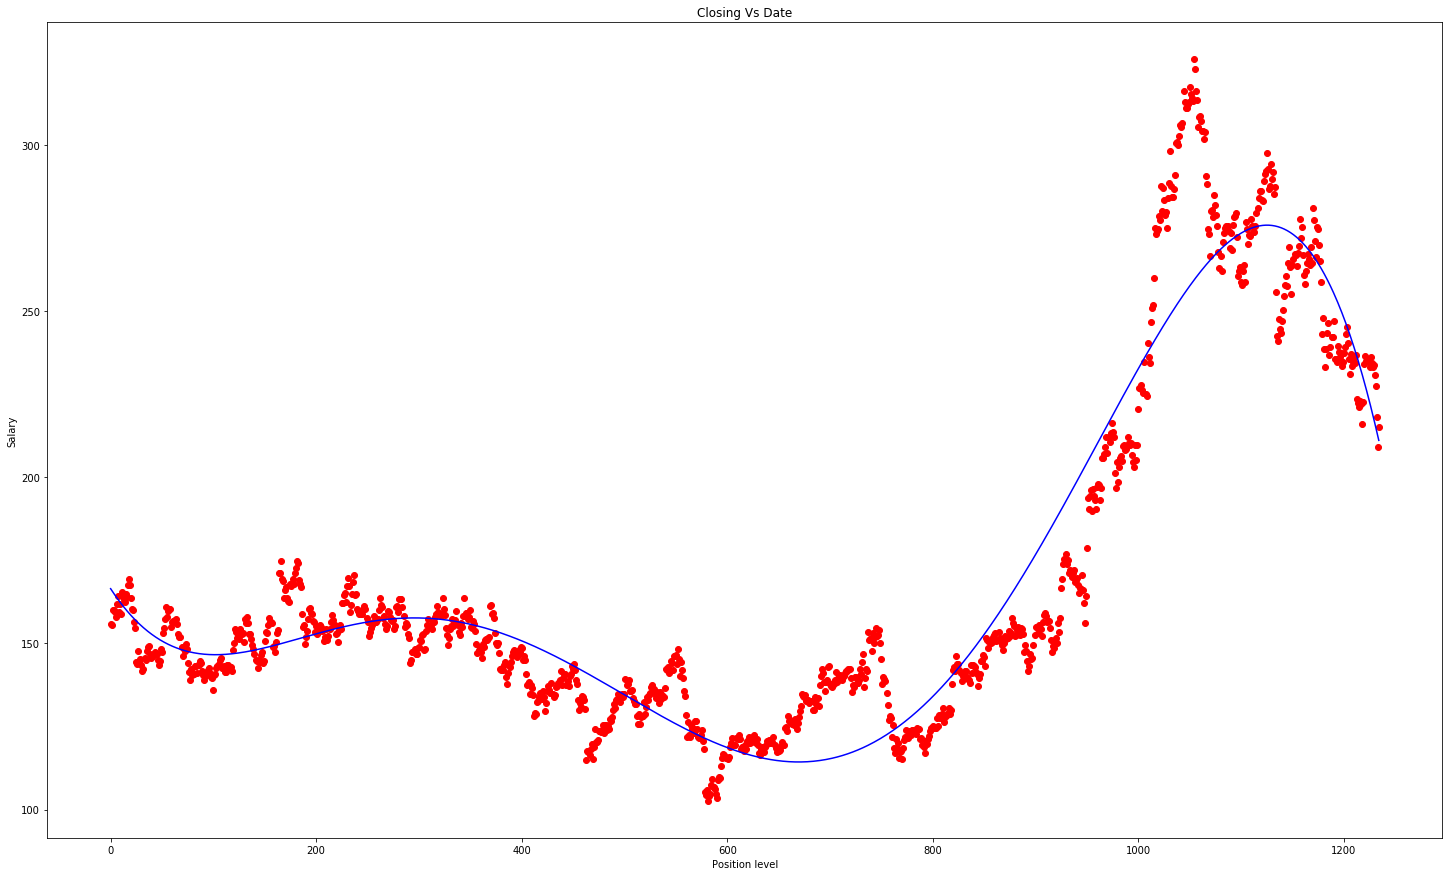

In [20]:
plt.figure(1, figsize=(25,15))
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(x_poly),color='blue')
plt.title('Closing Vs Date')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


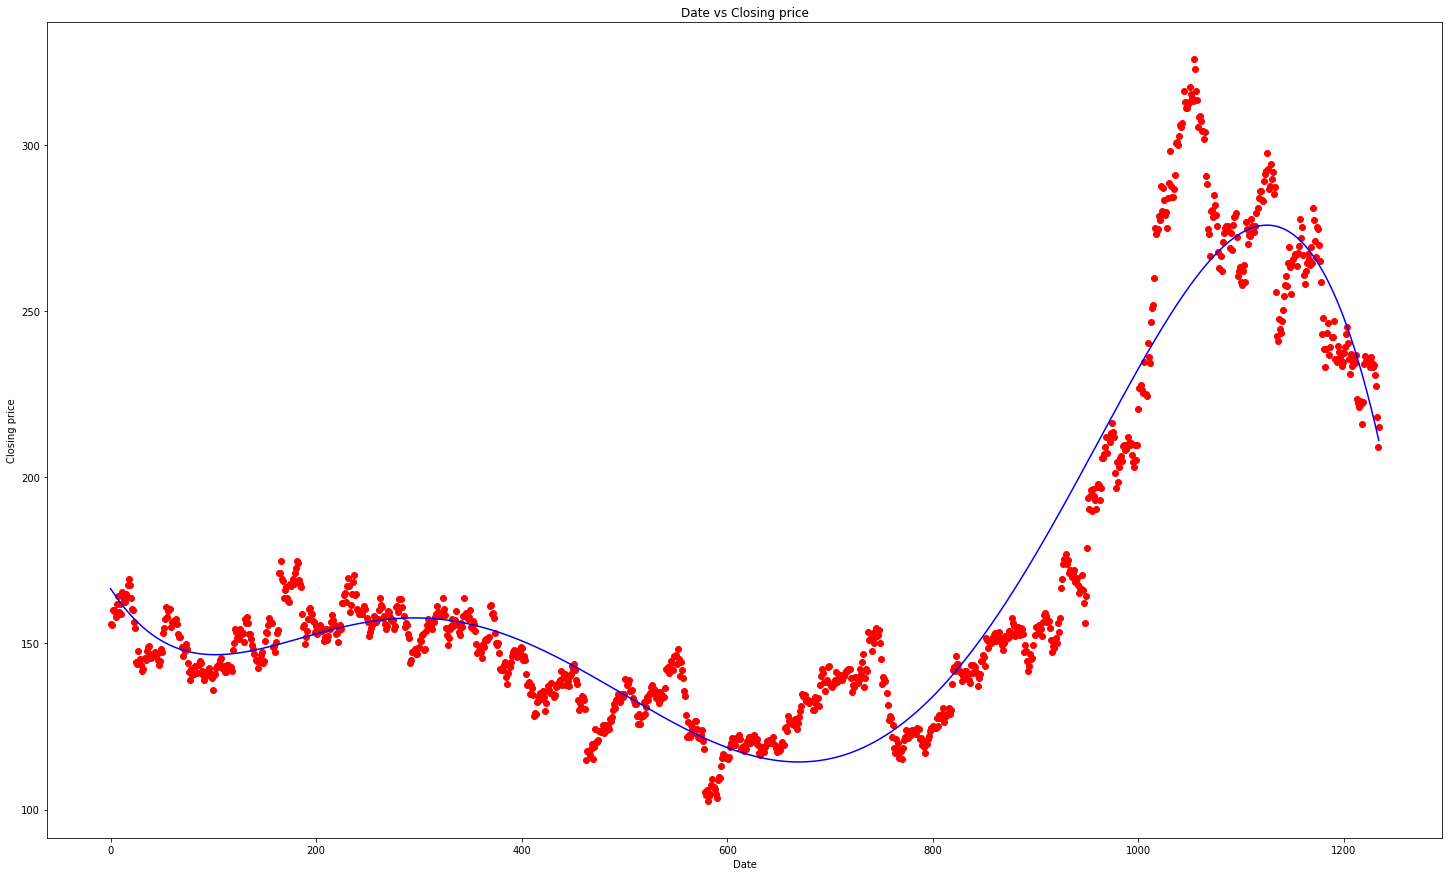

In [21]:
plt.figure(1, figsize=(25,15))
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape((len(x_grid),1)) # for rows =len() and column =1
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(x_poly),color='blue')
plt.title('Date vs Closing price')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()


In [22]:
y_pred=lin_reg_2.predict(x_poly)

In [23]:
y_pred

array([166.47247956, 166.00080426, 165.53646768, ..., 213.81078037,
       212.4729143 , 211.1175265 ])

# Regression Evaluation

In [24]:
df1= pd.DataFrame(df,columns=['Close'])
df1.head()

,Close
0,155.80
1,155.55
2,160.15
3,160.05
4,159.45


In [25]:
df2= pd.DataFrame(y_pred)
df2.head()

,0
0,166.472480
1,166.000804
2,165.536468
3,165.079408
4,164.629562


In [26]:
df2.rename(columns={0: "Predictions"},inplace=True)
df2.head()

,Predictions
0,166.472480
1,166.000804
2,165.536468
3,165.079408
4,164.629562


In [27]:
df_date=pd.DataFrame(df['Date'])
df_date.head()

,Date
0,08-10-2013
1,09-10-2013
2,10-10-2013
3,11-10-2013
4,14-10-2013


In [28]:
df_new = pd.concat([df_date,df1, df2],axis=1)
df_new.head()

,Date,Close,Predictions
0,08-10-2013,155.80,166.472480
1,09-10-2013,155.55,166.000804
2,10-10-2013,160.15,165.536468
3,11-10-2013,160.05,165.079408
4,14-10-2013,159.45,164.629562


In [29]:
# Generate 25 random numbers
randints = np.random.randint(1236, size=25)

# Select row numbers == random numbers
df_sample = df_new[df_new.index.isin(randints)]

In [30]:
randints

array([ 664,  116,  881,  252, 1033,  721,  996,  216,  397,  805, 1092,
        225, 1085,  738, 1041,   58,  510,  152,  240, 1035, 1152,   57,
       1146,  178,  759])

In [31]:
df_sample.head()

,Date,Close,Predictions
57,31-12-2013,160.45,149.584230
58,01-01-2014,160.50,149.439330
116,25-03-2014,142.90,146.811624
152,21-05-2014,153.10,148.819982
178,26-06-2014,167.80,150.970261


<Figure size 2880x2160 with 0 Axes>

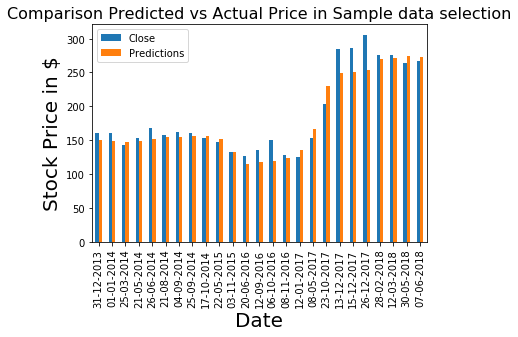

In [32]:
# Create subplots to plot graph and control axes
plt.figure(1, figsize=(40,30))
#fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Predictions'], kind='bar')

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=20)

# Set y label
plt.ylabel('Stock Price in $', fontsize=20)

# Show plot
plt.show()

C:\Users\priyansh singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


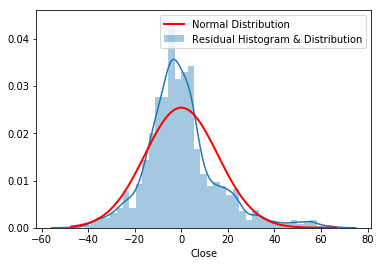

In [33]:


# Fit a normal distribution to the data:
mu, std = norm.fit(y - y_pred)

ax = sns.distplot((y - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y - y_pred), max(y - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [34]:
df_new.head()

,Date,Close,Predictions
0,08-10-2013,155.80,166.472480
1,09-10-2013,155.55,166.000804
2,10-10-2013,160.15,165.536468
3,11-10-2013,160.05,165.079408
4,14-10-2013,159.45,164.629562


In [35]:
# Statistical summary of data
df['Close'].describe()

count    1235.000000
mean      168.731053
std        51.544928
min       102.650000
25%       137.225000
50%       151.100000
75%       169.500000
max       325.750000
Name: Close, dtype: float64

### Error Evaluation Metrics
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

Mean Squared Error (MSE) is the mean of the squared errors:$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are cost functions we want to minimize.

In [36]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 11.314150922131887
Mean Squared Error: 246.39391237073315
Root Mean Squared Error: 15.696939586133762


# Accuracy Evaluation Metrics
To see how accurate our model is, we can calculate the Coefficient of determination, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model.

Coefficient of determination$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with

Residual Sum of Squares (RSS)$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

Total Sum of Squares (TSS)$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

In [37]:

explained_variance_score(y, y_pred)

0.9071867670814701

# MULTIPLE REGRESSION

In [38]:
x1=df.iloc[:,1:4].values        # storing all the independent variables we could also have done.iloc[:,0:2]
y1=df.iloc[:,4].values            # storing independent variables


In [39]:
x1

array([[157.  , 157.8 , 155.2 ],
       [155.7 , 158.2 , 154.15],
       [156.  , 160.8 , 155.85],
       ...,
       [223.5 , 227.8 , 216.15],
       [217.  , 218.6 , 205.9 ],
       [208.  , 222.25, 206.85]])

In [40]:
y1

array([155.8 , 155.3 , 160.3 , ..., 217.25, 210.25, 216.  ])

In [41]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)  # x_train will contain the indepent variables and there will be 80 percent data in the training set and only 20 percent in the test set as test size =.2   


In [42]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred1=regressor1.predict(x1_test)

In [44]:
# building the optimal model using backward elimination .Backward elimination is basically done to remove those independent variables which do not contribute more in deciding the depnedent variable
import statsmodels.formula.api as sm
x_opt=x1[:,[0,1,2]]  # we put all the independent varaibles in one array
regressor1_OLS=sm.OLS(endog=y,exog=x_opt).fit()  # creates an object.Endog takes dependent variable and exog takes independent varaibles
regressor1_OLS.summary() # here we will get to know about the p values


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.796e+06
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:52:11   Log-Likelihood:                -2057.6
No. Observations:                1235   AIC:                             4121.
Df Residuals:                    1232   BIC:                             4137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5679      0.018    -32.251      0.000      -0.602      -0.533
x2             0.8485      0.017     50.263      0.000       0.815       0.882
x3             0.7166      0.016     44.441      0.000       0.685       0.748
==============================================================================
Omnibus:                      167.251   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1948.529
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                       9.153   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Closing Price From Opening Price

In [45]:
x=np.array(df.Open).reshape(-1, 1)
y=np.array(df.Close).reshape(-1, 1)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression() 
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(regressor.coef_)))
# The Intercept
print('Intercept: ', regressor.intercept_)

Slope:  0.9994576912574024
Intercept:  [-0.02035206]


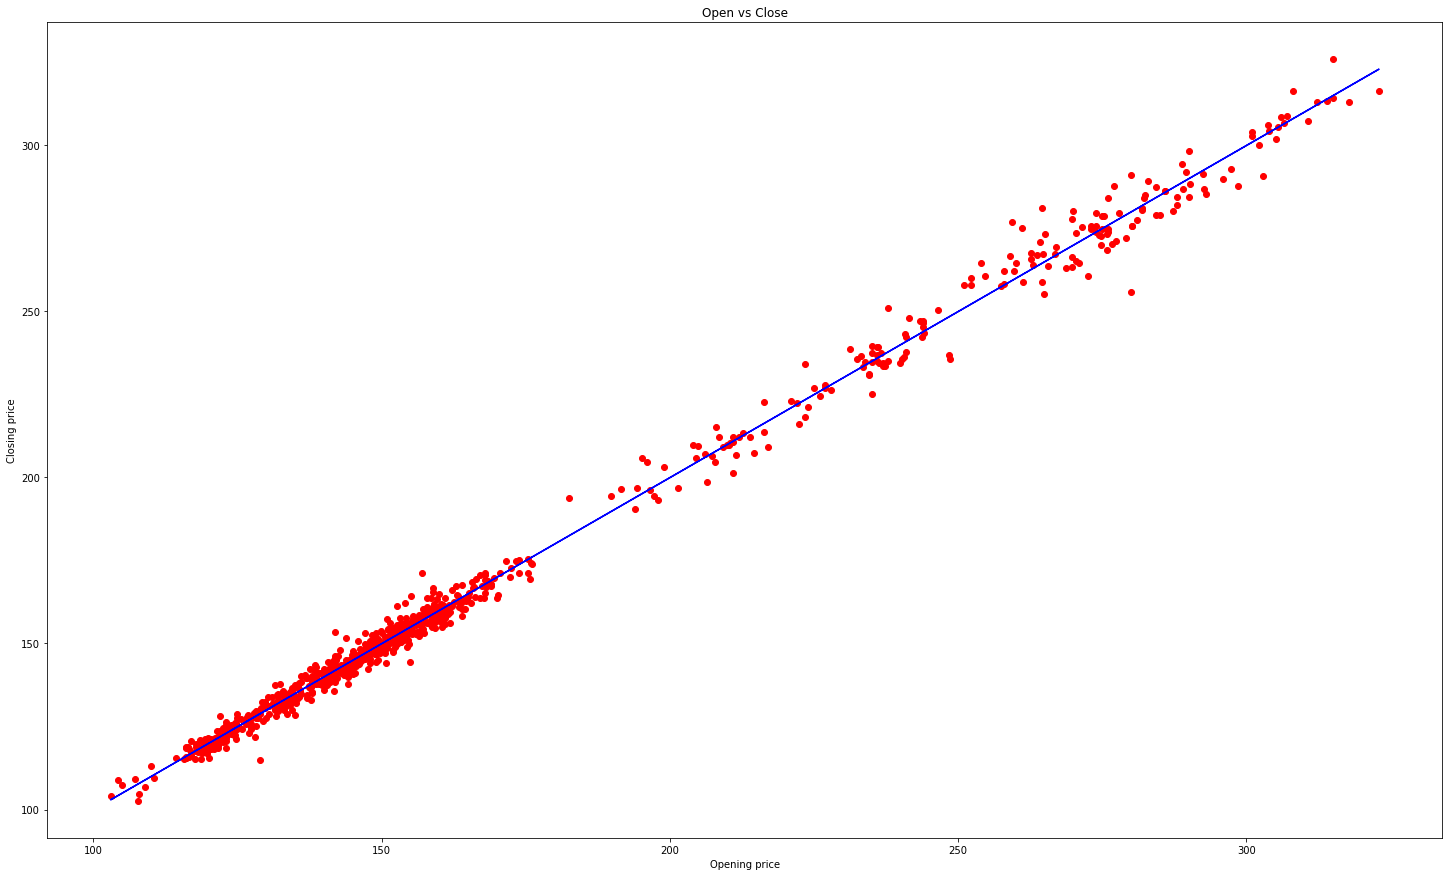

In [49]:
plt.figure(1, figsize=(25,15))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')  # this will plot the line
plt.title('Open vs Close')  # title of the graph
plt.xlabel('Opening price')
plt.ylabel('Closing price')
plt.show()

In [50]:
y_pred2=regressor.predict(x_test)

In [51]:
df22=pd.DataFrame(y_pred2)
df22.head()


,0
0,273.381299
1,167.888540
2,265.135773
3,128.959663
4,167.988486


In [52]:
df22.rename(columns={0: "Predictions"},inplace=True)
df22.head()

,Predictions
0,273.381299
1,167.888540
2,265.135773
3,128.959663
4,167.988486


In [53]:
df12= pd.DataFrame(y_test)
df12.head()

,0
0,273.50
1,169.50
2,263.20
3,130.10
4,167.85


In [54]:
df12.rename(columns={0: "Close"},inplace=True)
df12.head()

,Close
0,273.50
1,169.50
2,263.20
3,130.10
4,167.85


In [55]:
df_open=pd.DataFrame(df['Open'])
df_open.head()

,Open
0,157.00
1,155.70
2,156.00
3,161.15
4,160.85


In [56]:
df_new1 = pd.concat([df_open,df12, df22],axis=1)
df_new1.head()

,Open,Close,Predictions
0,157.00,273.50,273.381299
1,155.70,169.50,167.888540
2,156.00,263.20,265.135773
3,161.15,130.10,128.959663
4,160.85,167.85,167.988486


In [57]:
# Generate 25 random numbers
randints1 = np.random.randint(0,350, size=25)

# Select row numbers == random numbers
df_sample1 = df_new1[df_new1.index.isin(randints1)]

In [58]:
df_sample1.head()

,Open,Close,Predictions
2,156.0,263.20,265.135773
5,160.0,119.30,119.015059
9,160.4,240.45,225.657195
12,166.2,125.40,123.912402
40,147.6,265.60,264.935882


<Figure size 2880x2160 with 0 Axes>

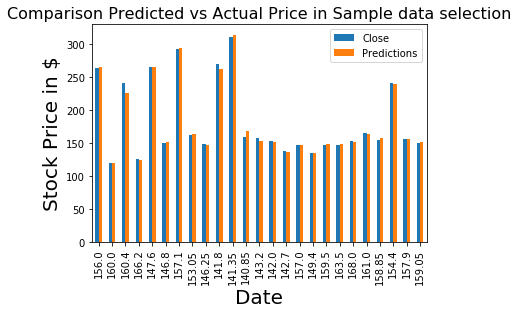

In [59]:
# Create subplots to plot graph and control axes
plt.figure(1, figsize=(40,30))
#fig, ax = plt.subplots()
df_sample1.plot(x='Open', y=['Close', 'Predictions'], kind='bar')

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=20)

# Set y label
plt.ylabel('Stock Price in $', fontsize=20)

# Show plot
plt.show()

In [60]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 2.3134993864512468
Mean Squared Error: 11.712869727881664
Root Mean Squared Error: 3.4224070079231756


In [61]:
explained_variance_score(y_test, y_pred2)

0.9959194533473701